In [94]:
import pandas as pd 
import datetime
import numpy as np

In [95]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
week_nums =[211002,210925,210918,210911,210911,210821,210814,210807,210731,210724,210717,210710,210703]                                               #[160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [96]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188
...,...,...,...,...,...,...,...,...,...,...,...
209825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,05:00:00,REGULAR,5554,585
209826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,09:00:00,REGULAR,5554,585
209827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,13:00:00,REGULAR,5554,585
209828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,17:00:00,REGULAR,5554,585


In [97]:
# new Row for DATE_TIME
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [98]:
turnstiles_df.sample(30)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
100406,N506,R022,00-00-01,34 ST-HERALD SQ,BDFMNQRW,IND,09/08/2021,16:00:00,REGULAR,556510,560095,2021-09-08 16:00:00
135666,R119,R320,00-00-01,CANAL ST,1,IRT,09/24/2021,13:00:00,REGULAR,10025670,3792047,2021-09-24 13:00:00
33353,H007A,R248,02-03-00,1 AV,L,BMT,07/29/2021,00:00:00,REGULAR,90046,1052641,2021-07-29 00:00:00
58868,N078,R175,01-00-03,14 ST,ACEL,IND,07/05/2021,09:00:00,REGULAR,2128670439,1154792780,2021-07-05 09:00:00
90404,N335,R158,01-06-00,KEW GARDENS,EF,IND,07/19/2021,06:30:00,REGULAR,5939512,1506708,2021-07-19 06:30:00
27550,D010,R394,00-00-01,BAY PKWY,N,BMT,09/23/2021,21:00:00,REGULAR,123379,120827,2021-09-23 21:00:00
27621,D010,R394,00-00-00,BAY PKWY,N,BMT,09/06/2021,13:00:00,REGULAR,3354397,973793,2021-09-06 13:00:00
138453,R138,R293,00-00-00,34 ST-PENN STA,123ACE,IRT,09/10/2021,06:00:00,REGULAR,1192032,364959,2021-09-10 06:00:00
36972,H030,R266,01-00-02,HALSEY ST,L,BMT,09/21/2021,20:00:00,REGULAR,3330326,10680451,2021-09-21 20:00:00
46712,N013,R035,02-00-00,168 ST,AC1,IND,09/07/2021,12:00:00,REGULAR,3797724,6025034,2021-09-07 12:00:00


In [99]:
# new row for Time INTERVAL  AM / PM
turnstiles_df["TIME_INTERVAL"] = (
    np.where( (turnstiles_df.DATE_TIME.dt.hour < 12), "AM"
         , "PM"))

In [100]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TIME_INTERVAL
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082,2021-09-25 00:00:00,AM
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083,2021-09-25 04:00:00,AM
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,2021-09-25 08:00:00,AM
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,2021-09-25 12:00:00,PM
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,2021-09-25 16:00:00,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,05:00:00,REGULAR,5554,585,2021-07-02 05:00:00,AM
209826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,09:00:00,REGULAR,5554,585,2021-07-02 09:00:00,AM
209827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,13:00:00,REGULAR,5554,585,2021-07-02 13:00:00,PM
209828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,17:00:00,REGULAR,5554,585,2021-07-02 17:00:00,PM


In [17]:
#turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME", "TIME_INTERVAL"], 
        #                  inplace=True, ascending=False)

In [101]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())

In [102]:
# new row for PREV_DATE and PREV_ENTRIES
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-102-1d82ead4f5b5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [103]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,7592792,NaT,NaN
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2021-06-26 00:00:00,7592792.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2021-06-26 04:00:00,7592804.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2021-06-26 08:00:00,7592816.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2021-06-26 12:00:00,7592870.0
...,...,...,...,...,...,...,...,...
2515717,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 05:00:00,5554,2021-10-01 01:00:00,5554.0
2515718,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 09:00:00,5554,2021-10-01 05:00:00,5554.0
2515719,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 13:00:00,5554,2021-10-01 09:00:00,5554.0
2515720,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 17:00:00,5554,2021-10-01 13:00:00,5554.0


In [104]:
#new Row for daily_entries
turnstiles_daily ['daily_entries'] = turnstiles_daily['ENTRIES'] -  turnstiles_daily['PREV_ENTRIES']
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,7592792,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2021-06-26 00:00:00,7592792.0,12.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2021-06-26 04:00:00,7592804.0,12.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2021-06-26 08:00:00,7592816.0,54.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2021-06-26 12:00:00,7592870.0,122.0
...,...,...,...,...,...,...,...,...,...
2515717,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 05:00:00,5554,2021-10-01 01:00:00,5554.0,0.0
2515718,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 09:00:00,5554,2021-10-01 05:00:00,5554.0,0.0
2515719,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 13:00:00,5554,2021-10-01 09:00:00,5554.0,0.0
2515720,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 17:00:00,5554,2021-10-01 13:00:00,5554.0,0.0


In [105]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,7592792,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2021-06-26 00:00:00,7592792.0,12.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2021-06-26 04:00:00,7592804.0,12.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2021-06-26 08:00:00,7592816.0,54.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2021-06-26 12:00:00,7592870.0,122.0


In [106]:
# cleaing by remove negative values 

def get_daily_counts(row, max_counter):
    counter = abs(row["ENTRIES"] - row["PREV_ENTRIES"])
    if counter > max_counter:
        counter = row["ENTRIES"]
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily['diff_'] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=40000)

In [108]:

turnstiles_daily = turnstiles_daily[~((turnstiles_daily['daily_entries']>0)
                   & (turnstiles_daily['daily_entries']!=turnstiles_daily['diff_']))]

In [109]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries,diff_
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,7592792,NaT,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2021-06-26 00:00:00,7592792.0,12.0,12.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2021-06-26 04:00:00,7592804.0,12.0,12.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2021-06-26 08:00:00,7592816.0,54.0,54.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2021-06-26 12:00:00,7592870.0,122.0,122.0
...,...,...,...,...,...,...,...,...,...,...
2515717,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 05:00:00,5554,2021-10-01 01:00:00,5554.0,0.0,0.0
2515718,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 09:00:00,5554,2021-10-01 05:00:00,5554.0,0.0,0.0
2515719,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 13:00:00,5554,2021-10-01 09:00:00,5554.0,0.0,0.0
2515720,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 17:00:00,5554,2021-10-01 13:00:00,5554.0,0.0,0.0


In [110]:
# drope null values 
turnstiles_daily.dropna(inplace=True)
turnstiles_daily

<ipython-input-110-c4ea2c050989>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_daily.dropna(inplace=True)


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries,diff_
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2021-06-26 00:00:00,7592792.0,12.0,12.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2021-06-26 04:00:00,7592804.0,12.0,12.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2021-06-26 08:00:00,7592816.0,54.0,54.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2021-06-26 12:00:00,7592870.0,122.0,122.0
5,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,7593116,2021-06-26 16:00:00,7592992.0,124.0,124.0
...,...,...,...,...,...,...,...,...,...,...
2515717,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 05:00:00,5554,2021-10-01 01:00:00,5554.0,0.0,0.0
2515718,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 09:00:00,5554,2021-10-01 05:00:00,5554.0,0.0,0.0
2515719,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 13:00:00,5554,2021-10-01 09:00:00,5554.0,0.0,0.0
2515720,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 17:00:00,5554,2021-10-01 13:00:00,5554.0,0.0,0.0


In [111]:
# new Row for Day 
turnstiles_daily['DAY_NUM']=pd.to_datetime(turnstiles_daily['DATE_TIME']).dt.weekday
turnstiles_daily['DAY']=pd.to_datetime(turnstiles_daily['DATE_TIME']).dt.day_name()

<ipython-input-111-cb4da5980180>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_daily['DAY_NUM']=pd.to_datetime(turnstiles_daily['DATE_TIME']).dt.weekday
<ipython-input-111-cb4da5980180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_daily['DAY']=pd.to_datetime(turnstiles_daily['DATE_TIME']).dt.day_name()


In [112]:
turnstiles_daily.sample(8)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries,diff_,DAY_NUM,DAY
444028,H030,R266,01-00-01,HALSEY ST,2021-07-12 00:00:00,752538,2021-07-11 20:00:00,7.525220e+05,16.0,16.0,0,Monday
1724582,R160,R164,02-00-00,66 ST-LINCOLN,2021-08-09 17:00:00,11438056,2021-08-09 13:00:00,1.143800e+07,61.0,61.0,0,Monday
1699860,R151,R033,00-00-01,TIMES SQ-42 ST,2021-08-01 12:00:00,1720277311,2021-08-01 08:00:00,1.720277e+09,85.0,85.0,6,Sunday
116936,A050,R088,00-05-03,CORTLANDT ST,2021-09-14 13:00:00,730265,2021-09-14 09:00:00,7.302180e+05,47.0,47.0,1,Tuesday
2246423,R510,R090,00-03-02,39 AV,2021-09-30 20:00:00,604610,2021-09-30 16:00:00,6.044370e+05,173.0,173.0,3,Thursday
2398874,R610,R057,00-04-05,ATL AV-BARCLAY,2021-09-20 12:00:00,74757,2021-09-20 08:00:00,7.470900e+04,48.0,48.0,0,Monday
118850,A052,R088,01-00-03,CORTLANDT ST,2021-08-13 17:00:00,148283,2021-08-13 13:00:00,1.482350e+05,48.0,48.0,4,Friday
61917,A033,R170,02-00-05,14 ST-UNION SQ,2021-09-13 17:00:00,276273,2021-09-13 13:00:00,2.753910e+05,882.0,882.0,0,Monday


In [113]:
# Time INTERVAL  AM / PM
turnstiles_daily["TIME_INTERVAL"] = (
    np.where( (turnstiles_daily.DATE_TIME.dt.hour < 12), "AM"
         , "PM"))

<ipython-input-113-404850bf50e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_daily["TIME_INTERVAL"] = (


In [114]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries,diff_,DAY_NUM,DAY,TIME_INTERVAL
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2021-06-26 00:00:00,7592792.0,12.0,12.0,5,Saturday,AM
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2021-06-26 04:00:00,7592804.0,12.0,12.0,5,Saturday,AM
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2021-06-26 08:00:00,7592816.0,54.0,54.0,5,Saturday,PM
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2021-06-26 12:00:00,7592870.0,122.0,122.0,5,Saturday,PM
5,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,7593116,2021-06-26 16:00:00,7592992.0,124.0,124.0,5,Saturday,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515717,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 05:00:00,5554,2021-10-01 01:00:00,5554.0,0.0,0.0,4,Friday,AM
2515718,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 09:00:00,5554,2021-10-01 05:00:00,5554.0,0.0,0.0,4,Friday,AM
2515719,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 13:00:00,5554,2021-10-01 09:00:00,5554.0,0.0,0.0,4,Friday,PM
2515720,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 17:00:00,5554,2021-10-01 13:00:00,5554.0,0.0,0.0,4,Friday,PM


In [188]:
# Busiest time of the day

busiestـtimeـofـtheـday =turnstiles_daily.groupby(["STATION","TIME_INTERVAL"])[["diff_"]].sum().reset_index().head(10)

In [189]:
import matplotlib.pyplot as plt

busiestـtimeـofـtheـday

,STATION,TIME_INTERVAL,diff_
0,1 AV,AM,262643.0
1,1 AV,PM,492191.0
2,103 ST,AM,364809.0
3,103 ST,PM,694947.0
4,103 ST-CORONA,AM,463921.0
5,103 ST-CORONA,PM,531426.0
6,104 ST,AM,89117.0
7,104 ST,PM,82049.0
8,110 ST,AM,128232.0
9,110 ST,PM,252781.0


In [211]:
# mask for station 1 AV
M1=((busiestـtimeـofـtheـday.STATION == '1 AV'))

X1=busiestـtimeـofـtheـday[M1]
X1

,STATION,TIME_INTERVAL,diff_
0,1 AV,AM,262643.0
1,1 AV,PM,492191.0


In [225]:
# ver
#import matplotlib.pyplot as plt
#plt.figure(figsize = (9,6))
#sns.countplot(x='TIME_INTERVAL',data=X1);
#import seaborn as sns
#sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("titanic")
#ax = sns.countplot(x="TIME_INTERVAL", data=X1)
#X1.plot(kind='barh',title='Satation 1 AV ')


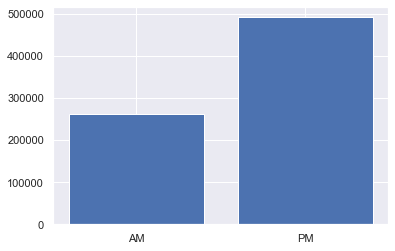

In [219]:
new_x = X1.TIME_INTERVAL
new_y =X1.diff_
plt.bar(new_x,new_y);

In [126]:
turnstiles_daily.groupby(["STATION"])[["diff_"]].sum().reset_index().sort_values('diff_',ascending=False).head(10)

,STATION,diff_
344,ST. GEORGE,6408189.0
259,JUNCTION BLVD,4690355.0
61,34 ST-PENN STA,4422143.0
247,HUNTS POINT AV,3922645.0
59,34 ST-HERALD SQ,3366271.0
233,GRD CNTRL-42 ST,3158665.0
226,FULTON ST,3057253.0
68,42 ST-PORT AUTH,3037847.0
46,23 ST,2905023.0
110,86 ST,2888863.0


In [224]:
xx

,STATION,diff_
0,1 AV,754834.0
1,103 ST,1059756.0
2,103 ST-CORONA,995347.0
3,104 ST,171166.0
4,110 ST,381013.0
...,...,...
374,WOODLAWN,300003.0
375,WORLD TRADE CTR,462715.0
376,WTC-CORTLANDT,315487.0
377,YORK ST,350883.0


In [222]:
# group by for top 10 stations 
Top10=xx.groupby(['STATION'])[["diff_"]].max().sort_values('diff_',ascending=False).head(10)

In [223]:
Top10

,diff_
STATION,
ST. GEORGE,6408189.0
JUNCTION BLVD,4690355.0
34 ST-PENN STA,4422143.0
HUNTS POINT AV,3922645.0
34 ST-HERALD SQ,3366271.0
GRD CNTRL-42 ST,3158665.0
FULTON ST,3057253.0
42 ST-PORT AUTH,3037847.0
23 ST,2905023.0


<AxesSubplot:title={'center':'Top 10 crowded Satations '}, ylabel='STATION'>

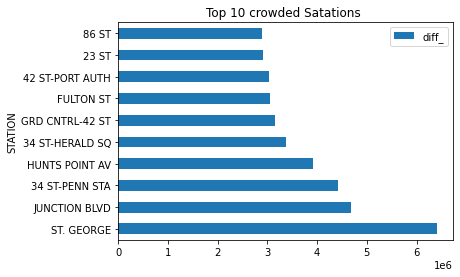

In [166]:
#bar chart for Top 10 crowded Satations
Top10.plot(kind='barh',title='Top 10 crowded Satations ')

In [129]:
# mask for station ST. GEORGE
mask=((turnstiles_daily.STATION == 'ST. GEORGE'))
S1=turnstiles_daily[mask]
#S1_ST.GEORGE
S1

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries,diff_,DAY_NUM,DAY,TIME_INTERVAL
2494663,S101,R070,00-00-00,ST. GEORGE,2021-06-26 04:00:00,1548582,2021-06-26 00:00:00,1548581.0,1.0,1.0,5,Saturday,AM
2494664,S101,R070,00-00-00,ST. GEORGE,2021-06-26 08:00:00,1548583,2021-06-26 04:00:00,1548582.0,1.0,1.0,5,Saturday,AM
2494665,S101,R070,00-00-00,ST. GEORGE,2021-06-26 12:00:00,1548600,2021-06-26 08:00:00,1548583.0,17.0,17.0,5,Saturday,PM
2494666,S101,R070,00-00-00,ST. GEORGE,2021-06-26 16:00:00,1548612,2021-06-26 12:00:00,1548600.0,12.0,12.0,5,Saturday,PM
2494667,S101,R070,00-00-00,ST. GEORGE,2021-06-26 20:00:00,1548622,2021-06-26 16:00:00,1548612.0,10.0,10.0,5,Saturday,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507135,S101A,R070,01-05-01,ST. GEORGE,2021-10-01 04:00:00,803,2021-10-01 00:00:00,803.0,0.0,0.0,4,Friday,AM
2507136,S101A,R070,01-05-01,ST. GEORGE,2021-10-01 08:00:00,803,2021-10-01 04:00:00,803.0,0.0,0.0,4,Friday,AM
2507137,S101A,R070,01-05-01,ST. GEORGE,2021-10-01 12:00:00,803,2021-10-01 08:00:00,803.0,0.0,0.0,4,Friday,PM
2507138,S101A,R070,01-05-01,ST. GEORGE,2021-10-01 16:00:00,803,2021-10-01 12:00:00,803.0,0.0,0.0,4,Friday,PM


In [215]:
#R is total of dailyentris in all dataframe during all days in ST. GEORGE
R=S1.groupby(["DAY"])[["diff_"]].sum().sort_values('diff_',ascending=False)
R

,diff_
DAY,
Wednesday,2484616.0
Sunday,2439601.0
Thursday,1271711.0
Saturday,57721.0
Tuesday,56322.0
Friday,50967.0
Monday,47251.0


<AxesSubplot:title={'center':'The busiest day of the week from ST. GEORGE '}, ylabel='DAY'>

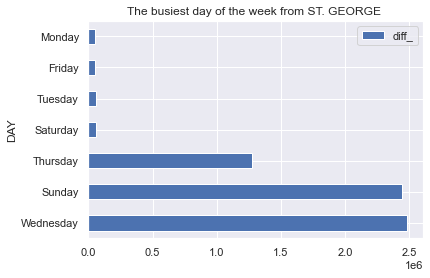

In [226]:
# bar chart for The busiest day of the week from ST. GEORGE
R.plot(kind='barh',title='The busiest day of the week from ST. GEORGE ')